# Online Shoppers Intention

### Kelompok 6
- Lintang Wisesa Atissalam (2206119256)
- Putu Raditya Astika Putra (2206020015)

<hr>

#### 1. Import packages

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<hr>

#### 2. Data Exploration

In [166]:
shop = pd.read_csv("online_shoppers_intention.csv")
shop.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [167]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [168]:
# dataframe general info function
def report(df):
    col, d_type, uniques, n_uniques, is_null = [], [], [], [], []

    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique())
        n_uniques.append(df[i].nunique())
        is_null.append(df[i].isnull().sum())

    return pd.DataFrame(
        {'Column': col, 'Type': d_type, 'Unique': uniques, 'n Unique': n_uniques, 'Null': is_null}
    )

report(shop)

Column     Type  \
0            Administrative    int64   
1   Administrative_Duration  float64   
2             Informational    int64   
3    Informational_Duration  float64   
4            ProductRelated    int64   
5   ProductRelated_Duration  float64   
6               BounceRates  float64   
7                 ExitRates  float64   
8                PageValues  float64   
9                SpecialDay  float64   
10                    Month   object   
11         OperatingSystems    int64   
12                  Browser    int64   
13                   Region    int64   
14              TrafficType    int64   
15              VisitorType   object   
16                  Weekend     bool   
17                  Revenue     bool   

                                               Unique  n Unique  Null  
0   [0, 1, 2, 4, 12, 3, 10, 6, 5, 9, 8, 16, 13, 11...        27     0  
1   [0.0, 53.0, 64.6, 6.0, 18.0, 9.0, 56.0, 16.0, ...      3335     0  
2   [0, 1, 2, 4, 16, 5, 3, 14, 6, 12, 7, 9, 10, 8,...        17     0  
3   [0.0, 120.0, 16.0, 94.0, 93.0, 75.0, 19.0, 22....      1258     0  
4   [1, 2, 10, 19, 0, 3, 16, 7, 6, 23, 13, 20, 8, ...       311     0  
5   [0.0, 64.0, 2.666666667, 627.5, 154.2166667, 3...      9551     0  
6   [0.2, 0.0, 0.05, 0.02, 0.015789474, 0.01875, 0...      1872     0  
7   [0.2, 0.1, 0.14, 0.05, 0.024561404, 0.02222222...      4777     0  
8   [0.0, 54.17976426, 19.44707913, 38.30849268, 2...      2704     0  
9                      [0.0, 0.4, 0.8, 1.0, 0.2, 0.6]         6     0  
10  [Feb, Mar, May, Oct, June, Jul, Aug, Nov, Sep,...        10     0  
11                           [1, 2, 4, 3, 7, 6, 8, 5]         8     0  
12        [1, 2, 3, 4, 5, 6, 7, 10, 8, 9, 12, 13, 11]        13     0  
13                        [1, 9, 2, 3, 4, 5, 6, 7, 8]         9     0  
14  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...        20     0  
15            [Returning_Visitor, New_Visitor, Other]         3     0  
16                                      [False, True]         2     0  
17                                      [False, True]         2     0

In [169]:
shop['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [170]:
shop.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

<hr>

#### 3. Data Visualization

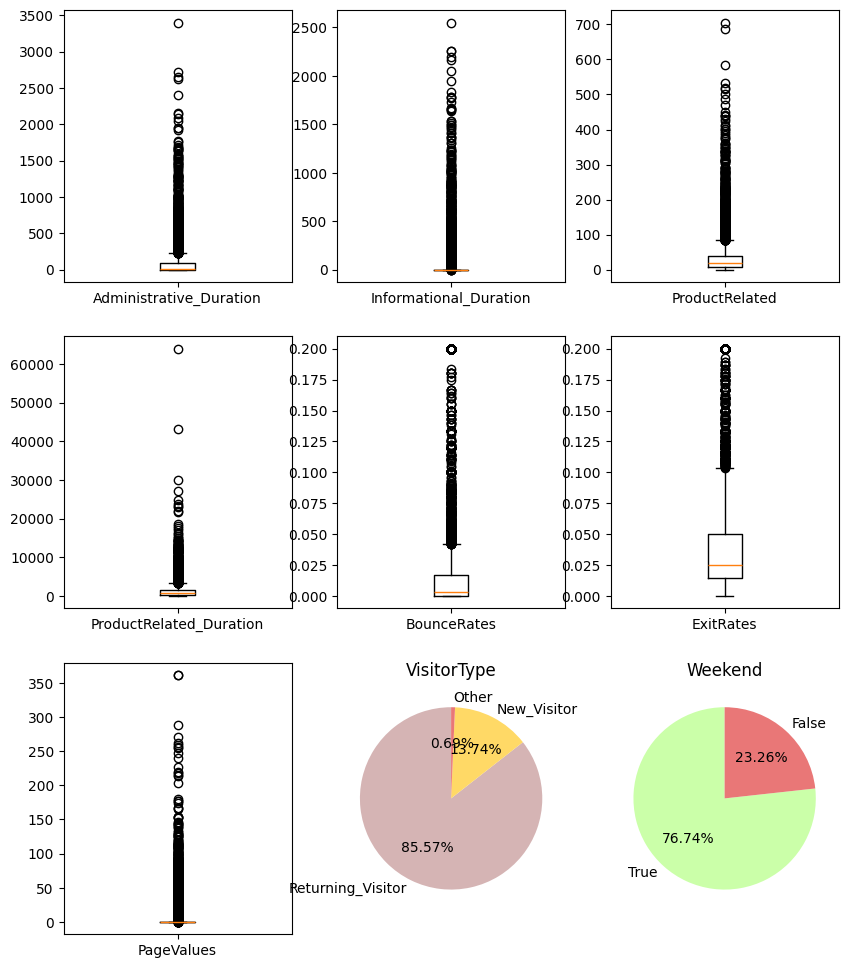

In [171]:
colors = ['#D5B4B4', '#FFD966', '#E97777']
fig, (
    (ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)
) = plt.subplots(3, 3, figsize=(10, 12))

ax1.boxplot(shop['Administrative_Duration'])
ax1.set_xticks([1], ['Administrative_Duration'])
ax2.boxplot(shop['Informational_Duration'])
ax2.set_xticks([1], ['Informational_Duration'])
ax3.boxplot(shop['ProductRelated'])
ax3.set_xticks([1], ['ProductRelated'])

ax4.boxplot(shop['ProductRelated_Duration'])
ax4.set_xticks([1], ['ProductRelated_Duration'])
ax5.boxplot(shop['BounceRates'])
ax5.set_xticks([1], ['BounceRates'])
ax6.boxplot(shop['ExitRates'])
ax6.set_xticks([1], ['ExitRates'])

ax7.boxplot(shop['PageValues'])
ax7.set_xticks([1], ['PageValues'])
ax8.set_title("VisitorType")
ax8.pie(shop['VisitorType'].value_counts(), labels=shop['VisitorType'].value_counts().index, autopct='%.2f%%', startangle=90, colors=colors)
ax9.set_title("Weekend")
ax9.pie(shop['Weekend'].value_counts(), labels=shop['Weekend'].value_counts().sort_values().index, autopct='%.2f%%', startangle=90, colors=['#CBFFA9', '#E97777'])

plt.show()

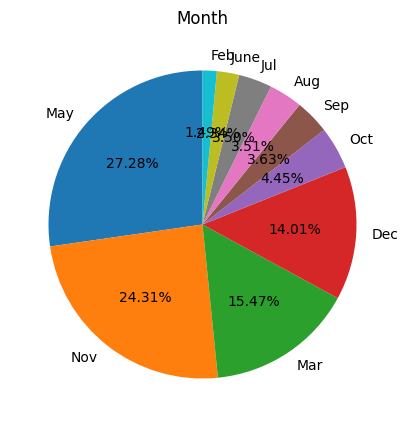

In [172]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.set_title("Month")
ax1.pie(shop['Month'].value_counts(), labels=shop['Month'].value_counts().index, autopct='%.2f%%', startangle=90)
plt.show()

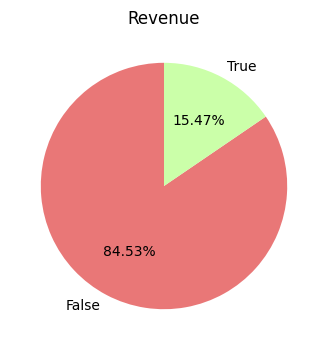

In [173]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4))
ax1.set_title("Revenue")
ax1.pie(shop['Revenue'].value_counts(), labels=shop['Revenue'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777','#CBFFA9'])
plt.show()

In [174]:
print('Revenue True : ', shop['Revenue'].value_counts()[True])
print('Revenue False : ', shop['Revenue'].value_counts()[False])

Revenue True :  1908
Revenue False :  10422


<hr>

#### 4. Data Preprocessing

**4.1 Outliers Handling**

In [175]:
# outliers
# x is low outliers if x < mean - (2.5 * std)
# x is high outliers if x > mean + (2.5 * std)

def getOutliersIndex(series):
    mean = series.mean()
    std = series.std()
    limitLow = mean - (2.5 * std)
    limitHigh = mean + (2.5 * std)
    return series[(series < limitLow) | (series > limitHigh)].index.to_list()

In [176]:
print(getOutliersIndex(shop['PageValues']))

[29, 198, 199, 200, 281, 295, 400, 457, 609, 637, 695, 806, 863, 903, 955, 1042, 1050, 1067, 1219, 1298, 1333, 1362, 1388, 1413, 1423, 1432, 1491, 1571, 1579, 1637, 1672, 1696, 1719, 1789, 1923, 1941, 1997, 2024, 2067, 2070, 2091, 2188, 2202, 2259, 2392, 2412, 2466, 2468, 2574, 2589, 2602, 2604, 2659, 2755, 2789, 2794, 2829, 2873, 2913, 2942, 2956, 3014, 3110, 3130, 3164, 3184, 3190, 3200, 3271, 3307, 3312, 3317, 3338, 3340, 3355, 3380, 3381, 3435, 3514, 3529, 3546, 3581, 3582, 3628, 3741, 3778, 3797, 3815, 3817, 3825, 3899, 3947, 4002, 4005, 4006, 4012, 4050, 4069, 4112, 4147, 4160, 4183, 4185, 4194, 4249, 4293, 4303, 4339, 4358, 4360, 4431, 4436, 4458, 4493, 4529, 4573, 4623, 4641, 4642, 4651, 4793, 4865, 4922, 4941, 4966, 4998, 5030, 5082, 5130, 5244, 5287, 5289, 5295, 5464, 5479, 5494, 5496, 5507, 5524, 5542, 5635, 5744, 5761, 5773, 5821, 5877, 5966, 5978, 6027, 6054, 6077, 6110, 6163, 6216, 6231, 6257, 6276, 6307, 6312, 6360, 6386, 6398, 6406, 6416, 6418, 6429, 6431, 6441, 6477, 6

In [177]:
# drop outliers
cols = [
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated', 
    'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues'
]
for i in cols:
    shop = shop.drop(getOutliersIndex(shop[i]))
shop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9680 entries, 1 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9680 non-null   int64  
 1   Administrative_Duration  9680 non-null   float64
 2   Informational            9680 non-null   int64  
 3   Informational_Duration   9680 non-null   float64
 4   ProductRelated           9680 non-null   int64  
 5   ProductRelated_Duration  9680 non-null   float64
 6   BounceRates              9680 non-null   float64
 7   ExitRates                9680 non-null   float64
 8   PageValues               9680 non-null   float64
 9   SpecialDay               9680 non-null   float64
 10  Month                    9680 non-null   object 
 11  OperatingSystems         9680 non-null   int64  
 12  Browser                  9680 non-null   int64  
 13  Region                   9680 non-null   int64  
 14  TrafficType            

In [178]:
print('Revenue True : ', shop['Revenue'].value_counts()[True])
print('Revenue False : ', shop['Revenue'].value_counts()[False])

Revenue True :  1290
Revenue False :  8390


<hr>

**4.2 Normalisasi**

Normalisasi $\displaystyle x' = \frac {x - x_{min}} {x_{max} - x_{min}}$ 

Data ternormalisasi memiliki nilai antara 0 & 1

In [179]:
# functions normalisasi series/feature/columns
# series = pd.Series(np.array([1,2,3,4], name="X"))

def normalize(series):
    return (series - series.min())/(series.max() - series.min())

In [180]:
cols = [
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated', 
    'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
    'Administrative', 'Informational', 'SpecialDay', 'OperatingSystems',
    'Browser', 'Region', 'TrafficType'
]
for i in cols:
    shop[i] = normalize(shop[i])
report(shop)

Column     Type  \
0            Administrative  float64   
1   Administrative_Duration  float64   
2             Informational  float64   
3    Informational_Duration  float64   
4            ProductRelated  float64   
5   ProductRelated_Duration  float64   
6               BounceRates  float64   
7                 ExitRates  float64   
8                PageValues  float64   
9                SpecialDay  float64   
10                    Month   object   
11         OperatingSystems  float64   
12                  Browser  float64   
13                   Region  float64   
14              TrafficType  float64   
15              VisitorType   object   
16                  Weekend     bool   
17                  Revenue     bool   

                                               Unique  n Unique  Null  
0   [0.0, 0.08695652173913043, 0.17391304347826086...        22     0  
1   [0.0, 0.10148396361895644, 0.12369554810914311...      2520     0  
2   [0.0, 0.08333333333333333, 0.16666666666666666...        11     0  
3   [0.0, 0.33317908372668403, 0.04442387783022453...       745     0  
4   [0.015503875968992248, 0.07751937984496124, 0....       130     0  
5   [0.01731496163742281, 0.16976778792941893, 0.0...      7944     0  
6   [0.0, 0.18000000018, 0.14210526614210528, 0.16...      1228     0  
7   [0.888888888888889, 0.4444444444444445, 0.2183...      3582     0  
8   [0.0, 0.9876827920225947, 0.3545151160058357, ...      1760     0  
9                      [0.0, 0.8, 0.4, 1.0, 0.2, 0.6]         6     0  
10  [Feb, Mar, May, Oct, June, Jul, Aug, Nov, Sep,...        10     0  
11  [0.14285714285714285, 0.2857142857142857, 0.0,...         8     0  
12  [0.08333333333333333, 0.16666666666666666, 0.2...        13     0  
13  [0.0, 0.125, 0.25, 0.375, 1.0, 0.5, 0.625, 0.7...         9     0  
14  [0.05263157894736842, 0.15789473684210525, 0.1...        20     0  
15            [Returning_Visitor, New_Visitor, Other]         3     0  
16                                      [False, True]         2     0  
17                                      [False, True]         2     0

<hr>

**4.3 Labeling (label encoder)**

Label encoder pada binary features
- False = **0**
- True = **1**

In [181]:
shop = shop.replace([False], 0)
shop = shop.replace([True], 1)
report(shop)

Column     Type  \
0            Administrative  float64   
1   Administrative_Duration  float64   
2             Informational  float64   
3    Informational_Duration  float64   
4            ProductRelated  float64   
5   ProductRelated_Duration  float64   
6               BounceRates  float64   
7                 ExitRates  float64   
8                PageValues  float64   
9                SpecialDay  float64   
10                    Month   object   
11         OperatingSystems  float64   
12                  Browser  float64   
13                   Region  float64   
14              TrafficType  float64   
15              VisitorType   object   
16                  Weekend    int64   
17                  Revenue    int64   

                                               Unique  n Unique  Null  
0   [0.0, 0.08695652173913043, 0.17391304347826086...        22     0  
1   [0.0, 0.10148396361895644, 0.12369554810914311...      2520     0  
2   [0.0, 0.08333333333333333, 0.16666666666666666...        11     0  
3   [0.0, 0.33317908372668403, 0.04442387783022453...       745     0  
4   [0.015503875968992248, 0.07751937984496124, 0....       130     0  
5   [0.01731496163742281, 0.16976778792941893, 0.0...      7944     0  
6   [0.0, 0.18000000018, 0.14210526614210528, 0.16...      1228     0  
7   [0.888888888888889, 0.4444444444444445, 0.2183...      3582     0  
8   [0.0, 0.9876827920225947, 0.3545151160058357, ...      1760     0  
9                      [0.0, 0.8, 0.4, 1.0, 0.2, 0.6]         6     0  
10  [Feb, Mar, May, Oct, June, Jul, Aug, Nov, Sep,...        10     0  
11  [0.14285714285714285, 0.2857142857142857, 0.0,...         8     0  
12  [0.08333333333333333, 0.16666666666666666, 0.2...        13     0  
13  [0.0, 0.125, 0.25, 0.375, 1.0, 0.5, 0.625, 0.7...         9     0  
14  [0.05263157894736842, 0.15789473684210525, 0.1...        20     0  
15            [Returning_Visitor, New_Visitor, Other]         3     0  
16                                             [0, 1]         2     0  
17                                             [0, 1]         2     0

<hr>

**4.4 Handle Imbalanced Dataset**

- Oversampling/Upsampling is suitable when you don’t have a lots of observations in your dataset (<10K observations).
- Undersampling/Downsampling is suitable when you don’t have a lots of observations in your dataset (>10K observations).

In [184]:
print('Revenue Yes : ', shop['Revenue'].value_counts()[1])
print('Revenue No : ', shop['Revenue'].value_counts()[0])

Revenue Yes :  1290
Revenue No :  8390


In [185]:
shop_minor = shop[shop['Revenue'] == 1]
shop_major = shop[shop['Revenue'] == 0]

# Upsample minority class
shop_minor_upsampled = resample(
    shop_minor, 
    replace=True,
    n_samples=len(shop_major),
    random_state=1234
)

# Combine minor & major as a dataframe
shop_upsampled = pd.concat([shop_major, shop_minor_upsampled])
print('Revenue Yes : ', shop_upsampled['Revenue'].value_counts()[1])
print('Revenue No : ', shop_upsampled['Revenue'].value_counts()[0])

Revenue Yes :  8390
Revenue No :  8390


<hr>

**4.5 Feature Separation**

In [187]:
# Separate feature predictors (x) & target (y)

x = shop_upsampled.drop(['Revenue'], axis=1)
print(x.columns)
print(x.iloc[0])

y = shop_upsampled['Revenue']
print(y.name)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')
Administrative                           0.0
Administrative_Duration                  0.0
Informational                            0.0
Informational_Duration                   0.0
ProductRelated                      0.015504
ProductRelated_Duration             0.017315
BounceRates                              0.0
ExitRates                           0.888889
PageValues                               0.0
SpecialDay                               0.0
Month                                    Feb
OperatingSystems                    0.142857
Browser                             0.083333
Region                                   0.0
TrafficType                     